In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(os.curdir))
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier


['.git', 'bulk_test.json', 'data_values.csv', 'data_values_good.csv', 'dtree_dl.ipynb', 'KNN_dl.ipynb', 'labels.csv', 'labels_good.csv', 'putLabels.py']


In [17]:
labels = pd.read_csv("labels_good.csv")
labels = labels.set_index('rider_provider')
labels['aggregate'] = labels[['wce_label','eps_label','de_label','pe_label','roe_label','growth_rate_label','profitm_label','grossm_label','ro40_label','churnrate_label','EVbyEbidta_label','marketCap_label','magicNum_label']].sum(axis = 1, skipna = True)

In [18]:
avg_labels = labels.mean(axis = 0, skipna = True).fillna(0).to_dict()
for key in labels.keys():
  labels[key] = labels[key].fillna(avg_labels[key])


In [19]:
# removed all Nan above

In [20]:

# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [21]:
labels['aggregate'] = labels['aggregate'].astype(int)
X = labels[['GrossProfit','GrossMargin','WorkingCapitalRatio','EarningPerShare','DebtToEquityRatio','PEratio','ReturnOfEquity','EBIDTAratio','EvRatio','EVbyEbidta','ChurnRate','GrowthRate','ProfitMargin','RuleOf40','MarketCap','MagicNumber']]
y = labels['aggregate']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
np.unique(labels['aggregate'].to_numpy())

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [24]:
np.unique(y_train.to_numpy())

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

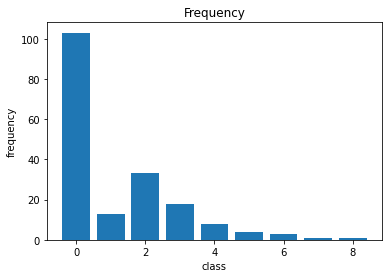

In [25]:
count = {}
for x,y in zip(X_train.to_numpy(), y_train.to_numpy()):
  if y not in count:
    count[y] = 0
  count[y] += 1

x = list(count.keys())
y = list(count.values())

plt.bar(x, y)                # plot the points in the array a
plt.title("Frequency")  # Add a title to the figure
plt.xlabel("class")    # Give a label to the x-axis
plt.ylabel("frequency");    # Give a label to the y-axis

In [26]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)

In [27]:
import seaborn as sn
df_cm = pd.DataFrame(cm, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])

<AxesSubplot:>

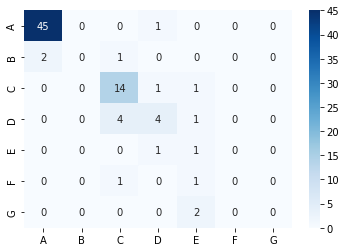

In [28]:
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print(accuracy_score(y_test, dtree_predictions))

0.8
